    Land Stadt       Kategorie                     Thema  Jahr  Unfaelle  \
0  de-sh  Kiel  gesetze_justiz  Strassenverkehrsunfaelle  1989      8570   
1  de-sh  Kiel  gesetze_justiz  Strassenverkehrsunfaelle  1990      9253   
2  de-sh  Kiel  gesetze_justiz  Strassenverkehrsunfaelle  1991      8578   
3  de-sh  Kiel  gesetze_justiz  Strassenverkehrsunfaelle  1992      8018   
4  de-sh  Kiel  gesetze_justiz  Strassenverkehrsunfaelle  1994      8145   

  Unfaelle mit Personenschaeden  Getoetete Personen  Verletzte  \
0                          1479                   9       1796   
1                          1573                   3       1915   
2                          1418                  13       1767   
3                          1451                   9       1818   
4                          1424                   8       1729   

   Fahrerfluchten  Alkoholeinfluss  
0            1863              363  
1            1882              372  
2            1917              372 

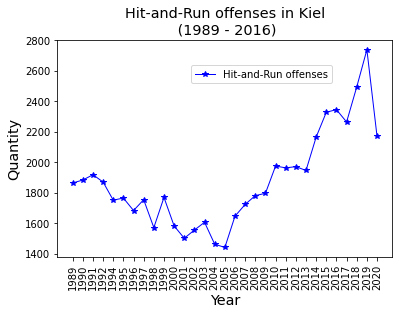

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io

# Fetch data from www.kiel.de
CSV_URL = "https://www.kiel.de/opendata/kiel_gesetze_justiz_strassenverkehsunfaelle_verkehrstote_verletzte_fahrerflucht.csv"
csv_data = requests.get(CSV_URL).content

# Create dataframe
df = pd.read_csv(io.StringIO(csv_data.decode("latin1")), sep=";")

# print head
print(df.head())

# Plot the data
fig, ax = plt.subplots()

df_cleaned = df.dropna(how="all")
df_years = df_cleaned["Jahr"].astype(np.uint16)

x = df_years.values
y = df_cleaned["Fahrerfluchten"].values

# print("Jahr = ", x)

plt.title("Hit-and-Run offenses in Kiel\n (1989 - 2020)", size="x-large")
plt.ylabel("Quantity", size="x-large")
plt.xlabel("Year", size="x-large")

plt.plot(y, "*-", markersize=6, linewidth=1, color="b", label="Hit-and-Run offenses")

plt.legend(loc=(0.4, 0.8))

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation="vertical")

plt.show()